### Import Libraries ###

In [127]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [128]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

### Read Dataset

In [129]:
hotel_df = pd.read_csv('hotel_bookings.csv')
hotel_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


### Count Null values

In [130]:
hotel_df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### Read null values in country

In [131]:
nan = hotel_df['country'].isna()
hotel_df[nan]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
30,Resort Hotel,0,118,2015,July,27,1,4,10,1,...,No Deposit,NaN,NaN,0,Transient,62.0,0,2,Check-Out,2015-07-15
4127,Resort Hotel,1,0,2016,February,8,15,0,0,0,...,No Deposit,NaN,383.0,0,Transient,0.0,0,0,Canceled,2016-02-15
7092,Resort Hotel,1,8,2016,July,30,21,0,1,1,...,No Deposit,NaN,204.0,0,Transient,73.0,0,2,Canceled,2016-07-20
7860,Resort Hotel,1,39,2016,August,36,30,0,5,2,...,No Deposit,NaN,NaN,0,Transient,159.0,0,5,Canceled,2016-07-22
8779,Resort Hotel,1,0,2016,October,42,13,0,1,1,...,No Deposit,NaN,457.0,0,Transient,50.0,0,0,Canceled,2016-10-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65908,City Hotel,1,0,2017,April,15,10,0,0,0,...,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2017-04-10
65909,City Hotel,1,0,2017,April,15,10,0,0,0,...,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2017-04-10
65910,City Hotel,1,0,2017,April,15,10,0,0,0,...,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2017-04-10
80830,City Hotel,0,4,2015,November,48,23,1,2,1,...,No Deposit,37.0,NaN,0,Transient-Party,70.0,0,0,Check-Out,2015-11-26


### Deletes null values in children and country columns

In [132]:
# Few null values compared to dataframe size
df_cleaned = hotel_df.dropna(subset=['children', 'country'])
clean_cols = df_cleaned.isna().sum()>0
list(clean_cols[clean_cols].index)

['agent', 'company']

In [133]:
# Checking if there are variables with only unique values
for col in df_cleaned.columns:
    if len(df_cleaned[col].unique())==1:
        print(col)

### Fills null values in df with strings

In [134]:
# Filling NaN values meaning something with their real meaning
df_cleaned = df_cleaned.fillna({'agent': 'No Agent', 'company': 'No Company'})
df_cleaned

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,No Agent,No Company,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,No Agent,No Company,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,No Agent,No Company,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,No Company,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,No Company,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,No Company,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,No Company,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,No Company,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,No Company,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [135]:
# Checking presence of NaN values
clean_cols = df_cleaned.isna().sum()>0
list(clean_cols[clean_cols].index)

[]

### Dropped variables beceause they have information about target variable

In [136]:
df_cleaned = df_cleaned.drop(['reservation_status', 'reservation_status_date'], axis=1)

### lead_time

Index    lead_time


1       737
4182    709
Name: lead_time, dtype: int64

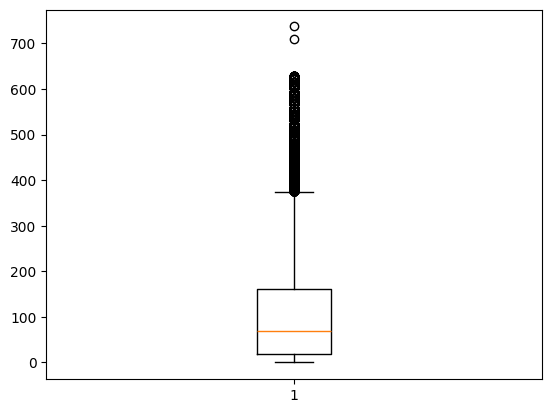

In [137]:
plt.boxplot(df_cleaned['lead_time'])
print('Index    lead_time')
outliers = df_cleaned['lead_time'].nlargest(2)
outliers


In [138]:
df_cleaned.loc[outliers.index]
df_cleaned = df_cleaned.drop(df_cleaned.loc[outliers.index].index)

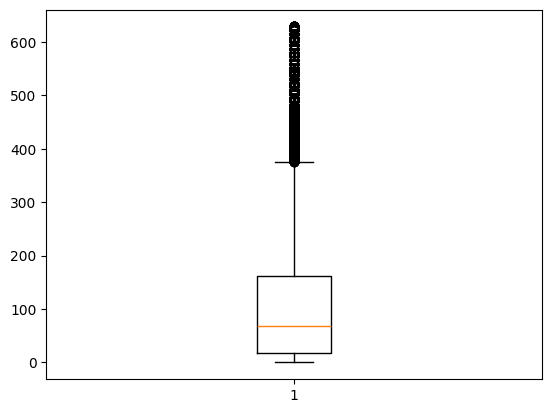

In [139]:
box = plt.boxplot(df_cleaned['lead_time'])

we dropped two most extreme outliers as we considered them too extreme for the analysis

### stays_in_weekend_nights

<Axes: ylabel='stays_in_weekend_nights'>

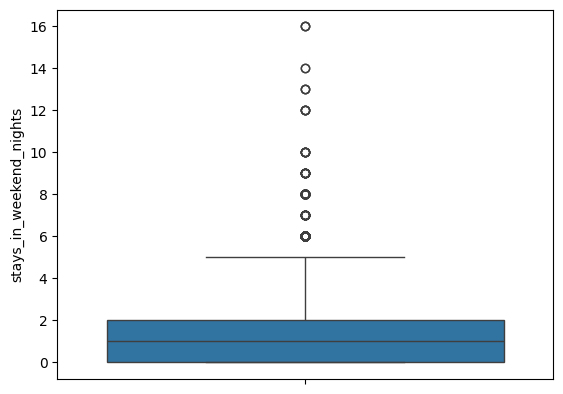

In [140]:
sns.boxplot(df_cleaned['stays_in_weekend_nights'])

In [141]:
outliers = df_cleaned[df_cleaned['stays_in_weekend_nights']>10]
print(len(outliers))
print('Index:   stays_in_weekend_nights')
print(df_cleaned['stays_in_weekend_nights'].nlargest(13))
df_cleaned.loc[outliers.index]
df_cleaned = df_cleaned.drop(df_cleaned.loc[outliers.index].index)

13
Index:   stays_in_weekend_nights
9839      16
33924     16
101794    16
54704     14
88017     14
1655      13
32589     13
106561    13
3820      12
3850      12
34614     12
34898     12
35059     12
Name: stays_in_weekend_nights, dtype: int64


<Axes: ylabel='stays_in_weekend_nights'>

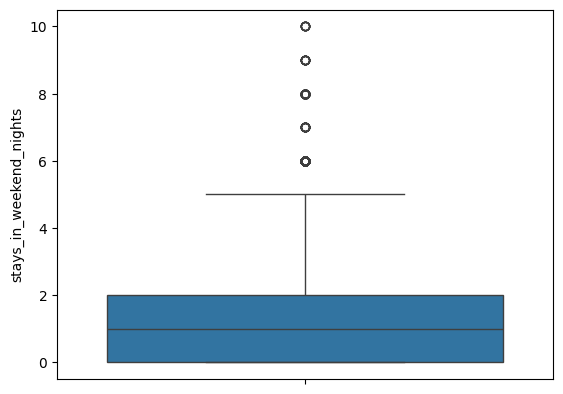

In [142]:
sns.boxplot(df_cleaned['stays_in_weekend_nights'])


we dropped a 13 outliers having a value we considered too high, we considered stays under one month and a half

### stays_in_week_nights

<Axes: ylabel='stays_in_week_nights'>

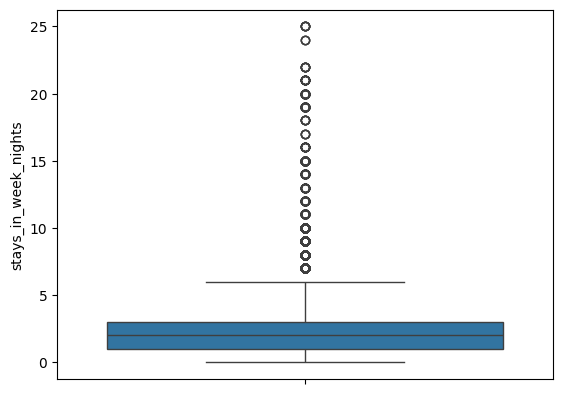

In [143]:
sns.boxplot(df_cleaned['stays_in_week_nights'])


In [144]:
outliers = df_cleaned[df_cleaned['stays_in_week_nights']>30]
print(len(outliers))

0


we didn't drop anything because after dropping stauys_in_weekend_nights the data adjusted to prior analysis

### adults

<Axes: ylabel='adults'>

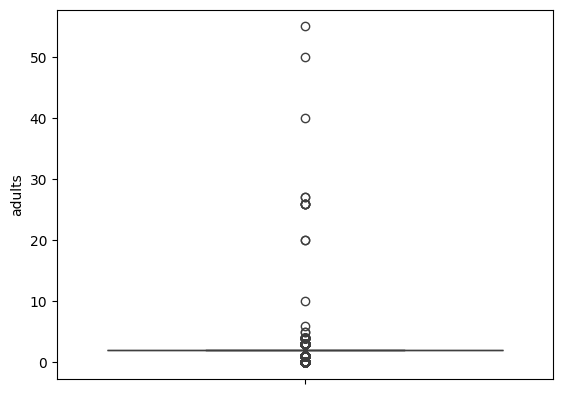

In [145]:
sns.boxplot(df_cleaned['adults'])

In [146]:
outliers = df_cleaned[df_cleaned['adults']>=10]
print(len(outliers))
print('Index:   adults')
print(df_cleaned['adults'].nlargest(13))
df_cleaned.loc[outliers.index]
df_cleaned = df_cleaned.drop(df_cleaned.loc[outliers.index].index)

13
Index:   adults
2173    55
1643    50
1539    40
1917    27
1962    27
1587    26
1752    26
1884    26
2003    26
2164    26
2228    20
2418    20
2417    10
Name: adults, dtype: int64


<Axes: ylabel='adults'>

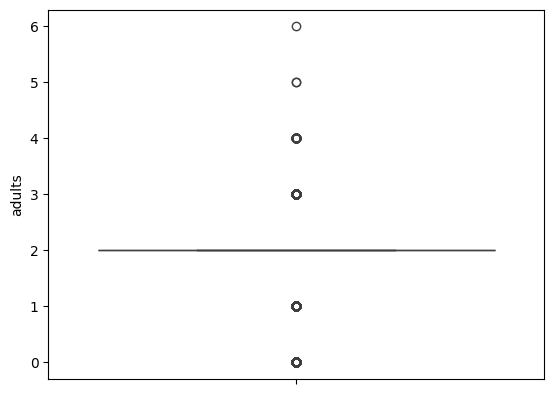

In [147]:
sns.boxplot(df_cleaned['adults'])

we dropped 12 outliers (>= 10 adults). More people cancelling = more momey lost, but at the same time we decided to focus on the highest number of bookings, which included less than 10 adulta (less people booking but higher number of cancellations) to get a more precise output.

### children

<Axes: ylabel='children'>

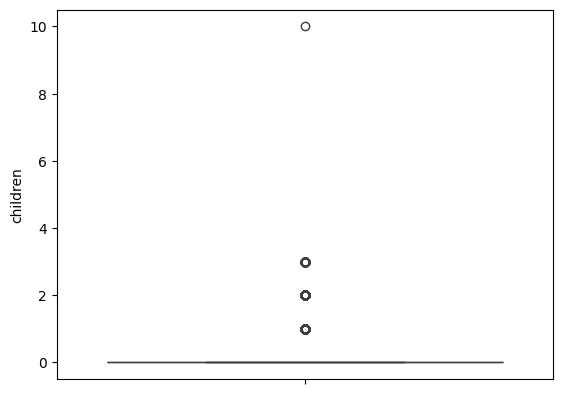

In [148]:
sns.boxplot(df_cleaned['children'])


In [149]:
outliers = df_cleaned[df_cleaned['children']>8]
print(len(outliers))
print('Index:   children')
print(df_cleaned['children'].nlargest(2))
df_cleaned.loc[outliers.index]
df_cleaned = df_cleaned.drop(df_cleaned.loc[outliers.index].index)

1
Index:   children
328     10.0
6748     3.0
Name: children, dtype: float64


<Axes: ylabel='children'>

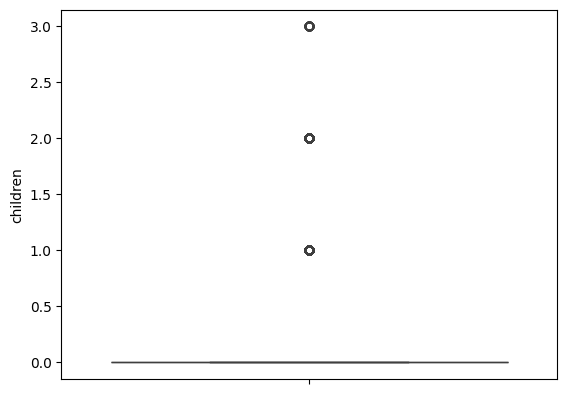

In [150]:
sns.boxplot(df_cleaned['children'])

we dropped one outlier (10 childre) because it was too distant from the other values (including number of children from 0 to 3)

### previous_cancellations

<Axes: ylabel='previous_cancellations'>

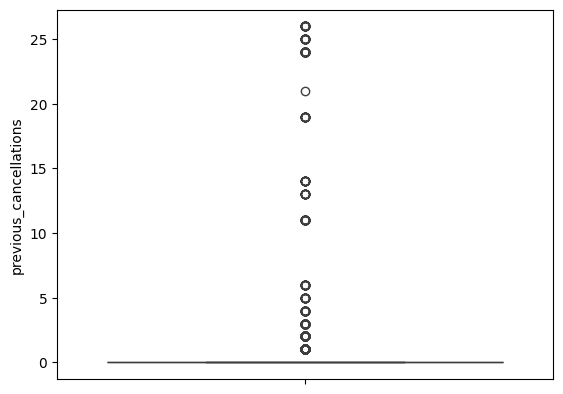

In [151]:
sns.boxplot(df_cleaned['previous_cancellations'])


we decided to keep the number of cancellations in order to know how likely the consumer is to cancel again

### previous_bookings_not_canceled

<Axes: ylabel='previous_bookings_not_canceled'>

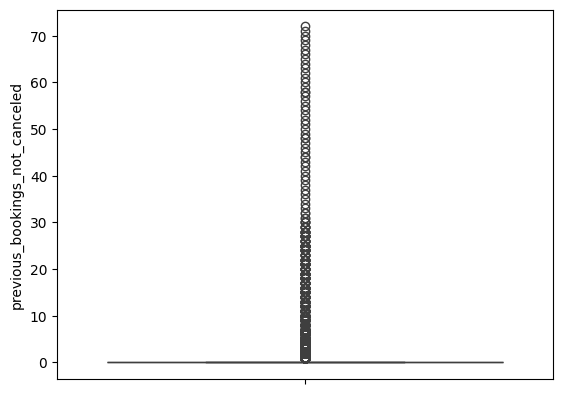

In [152]:
sns.boxplot(df_cleaned['previous_bookings_not_canceled'])


we decided to keep the number of cancellations in order to know how likely the consumer is to cancel again

### booking_changes

<Axes: ylabel='booking_changes'>

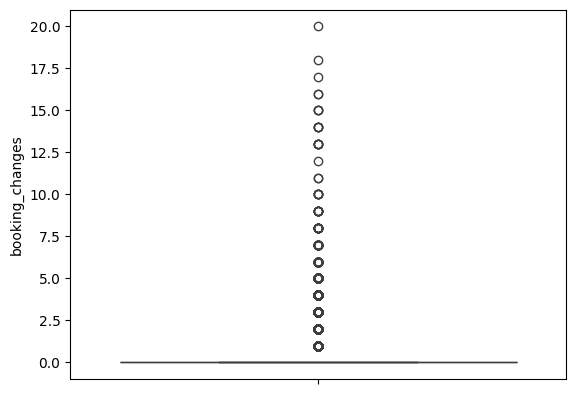

In [153]:
sns.boxplot(df_cleaned['booking_changes'])


In [154]:
outliers = df_cleaned[df_cleaned['booking_changes']>5]
print(len(outliers))
print('Index:   booking_changes')
print(df_cleaned['booking_changes'].nlargest(20))
df_cleaned.loc[outliers.index]
df_cleaned = df_cleaned.drop(df_cleaned.loc[outliers.index].index)

143
Index:   booking_changes
41020     20
111682    18
51964     17
9106      16
111689    16
51952     15
51977     15
111683    15
51919     14
102717    14
109038    14
111702    14
23784     13
38759     13
51773     13
51776     13
51853     13
23849     12
76985     11
118579    11
Name: booking_changes, dtype: int64


<Axes: ylabel='booking_changes'>

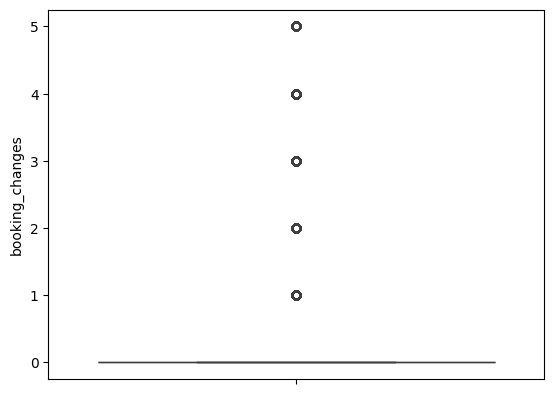

In [155]:
sns.boxplot(df_cleaned['booking_changes'])


We dropped 143 outliers because they number of occurencies was so little it did not influence the overall result

### days_in_waiting_list

<Axes: ylabel='days_in_waiting_list'>

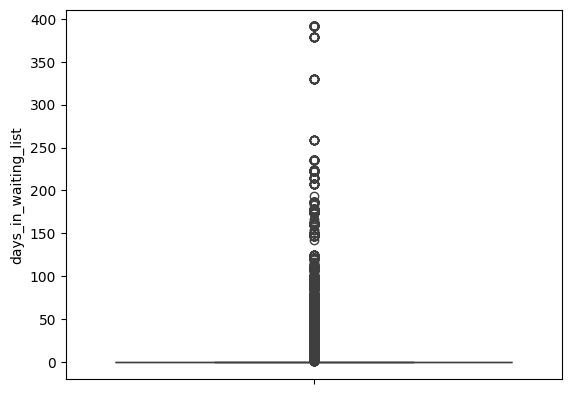

In [156]:
sns.boxplot(df_cleaned['days_in_waiting_list'])


In [157]:
outliers = df_cleaned[df_cleaned['days_in_waiting_list']>250]
print(len(outliers))
print('Index:   days_in_waiting_list')
print(df_cleaned['days_in_waiting_list'].nlargest(85))
df_cleaned = df_cleaned.drop(df_cleaned.loc[outliers.index].index)

85
Index:   days_in_waiting_list
58152    391
58153    391
58154    391
58155    391
58157    391
        ... 
50614    259
50664    259
50668    259
50683    259
50721    259
Name: days_in_waiting_list, Length: 85, dtype: int64


<Axes: ylabel='days_in_waiting_list'>

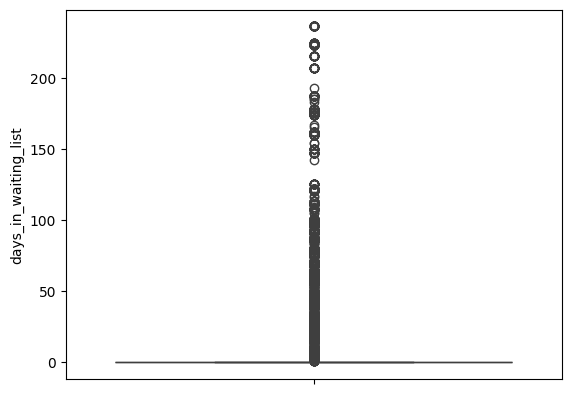

In [158]:
sns.boxplot(df_cleaned['days_in_waiting_list'])


We dropped 85 outliers because we considered them as extreme outliers since we identified a clear gap in the graph  

### adr

<Axes: ylabel='adr'>

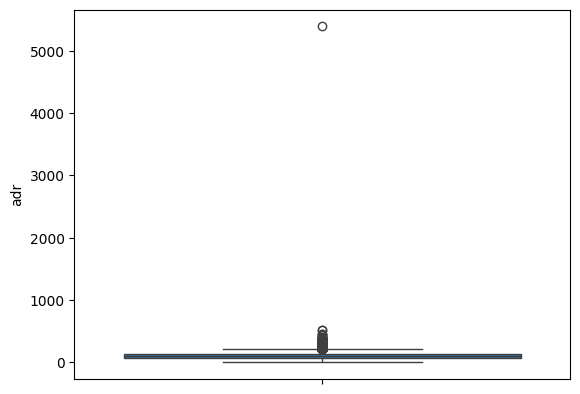

In [159]:
sns.boxplot(df_cleaned['adr'])


In [160]:
outliers = df_cleaned[df_cleaned['adr']>1000]
print(len(outliers))
print('Index:   adr')
print(df_cleaned['adr'].nlargest(10))
df_cleaned = df_cleaned.drop(df_cleaned.loc[outliers.index].index)

1
Index:   adr
48515     5400.00
111403     510.00
15083      508.00
103912     451.50
13142      450.00
13391      437.00
39155      426.25
39568      402.00
39118      397.38
13323      392.00
Name: adr, dtype: float64


<Axes: ylabel='adr'>

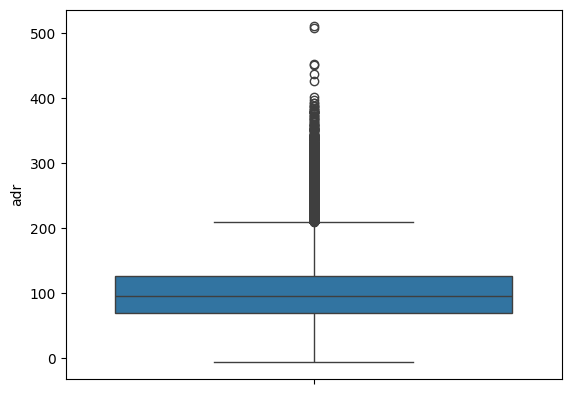

In [161]:
sns.boxplot(df_cleaned['adr'])


We dropped 1 outlier because it was an extreme one 

### required_car_parking_spaces

<Axes: ylabel='required_car_parking_spaces'>

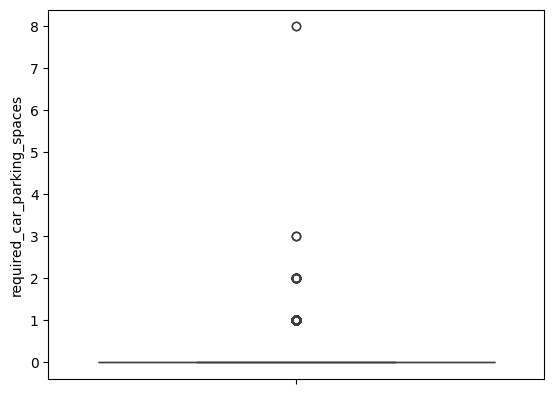

In [162]:
sns.boxplot(df_cleaned['required_car_parking_spaces'])


In [163]:
outliers = df_cleaned[df_cleaned['required_car_parking_spaces']>7]
print(len(outliers))
print('Index:   required_car_parking_spaces')
print(df_cleaned['required_car_parking_spaces'].nlargest(10))
df_cleaned = df_cleaned.drop(df_cleaned.loc[outliers.index].index)

2
Index:   required_car_parking_spaces
29045     8
29046     8
38117     3
102762    3
110812    3
140       2
2568      2
6150      2
8904      2
14039     2
Name: required_car_parking_spaces, dtype: int64


<Axes: ylabel='required_car_parking_spaces'>

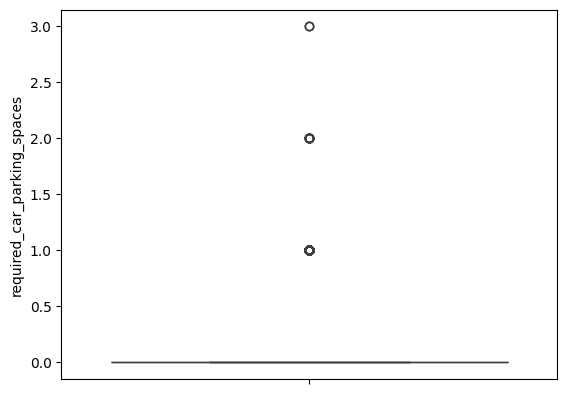

In [164]:
sns.boxplot(df_cleaned['required_car_parking_spaces'])

We dropped 2 extreme outliers because they would affect the analysis too much resulting in less accuracy

### Total of special requests

<Axes: ylabel='total_of_special_requests'>

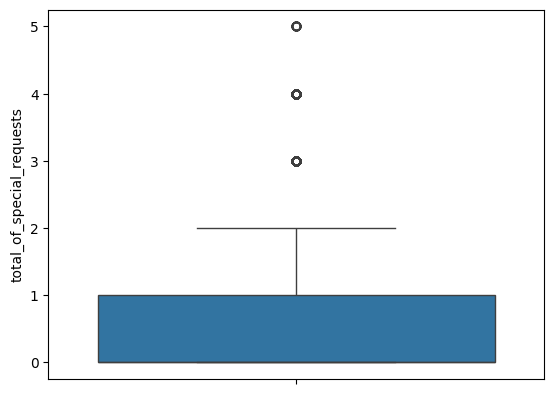

In [165]:
sns.boxplot(df_cleaned['total_of_special_requests'])


In [166]:
outliers = df_cleaned[df_cleaned['total_of_special_requests']>3]
print(len(outliers))
print('Index:   total_of_special_requests')
print(df_cleaned['total_of_special_requests'].nlargest(375))
df_cleaned = df_cleaned.drop(df_cleaned.loc[outliers.index].index)

375
Index:   total_of_special_requests
11125     5
14921     5
14922     5
24630     5
27288     5
         ..
119248    4
119290    4
119291    4
119334    4
119387    4
Name: total_of_special_requests, Length: 375, dtype: int64


<Axes: ylabel='total_of_special_requests'>

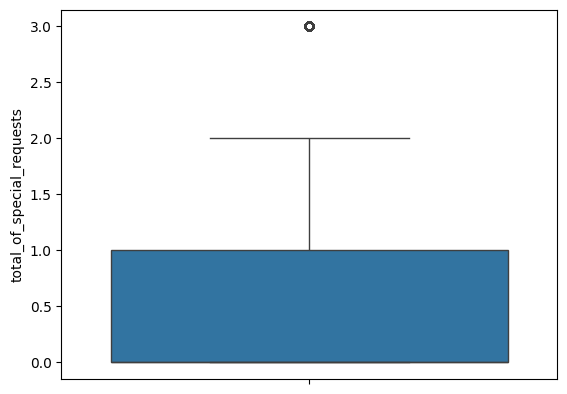

In [167]:
sns.boxplot(df_cleaned['total_of_special_requests'])


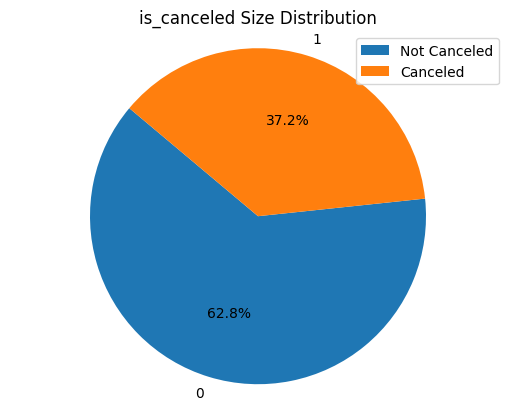

In [230]:
grouped = df_cleaned.groupby('is_canceled').size()
plt.pie(grouped, labels=grouped.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('is_canceled Size Distribution')
custom_labels = ['Not Canceled', 'Canceled']
plt.legend(custom_labels, loc='upper right')
plt.show()

In [236]:
grouped
not_canceled_count = 74248
canceled_count = 44015


We dropped 365 outliers (more than 5) because they would affect the analysis too much resulting in less accuracy

In [168]:
# Only canceled reservations
canceled_df = df_cleaned[df_cleaned['is_canceled']==1]
canceled_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,A,0,No Deposit,240.0,No Company,0,Transient,82.0,0,1
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,D,0,No Deposit,15.0,No Company,0,Transient,105.5,0,0
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,...,E,0,No Deposit,240.0,No Company,0,Transient,123.0,0,0
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,...,E,0,No Deposit,240.0,No Company,0,Transient,107.0,0,2
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,...,E,0,No Deposit,No Agent,No Company,0,Transient,108.3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110280,City Hotel,1,132,2017,April,17,25,0,0,0,...,K,1,No Deposit,9.0,No Company,0,Transient,0.0,0,3
111355,City Hotel,1,4,2017,June,23,5,1,0,1,...,A,0,No Deposit,No Agent,238.0,0,Transient,65.0,0,0
111924,City Hotel,1,7,2017,May,22,31,0,1,1,...,A,0,No Deposit,No Agent,238.0,0,Transient,65.0,0,0
111925,City Hotel,1,6,2017,July,29,17,1,0,1,...,D,0,No Deposit,No Agent,238.0,0,Transient,65.0,0,0


In [169]:
not_canceled_df = df_cleaned[df_cleaned['is_canceled']==0]
not_canceled_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,No Agent,No Company,0,Transient,0.00,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,No Agent,No Company,0,Transient,75.00,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,304.0,No Company,0,Transient,75.00,0,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,240.0,No Company,0,Transient,98.00,0,1
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,240.0,No Company,0,Transient,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119384,City Hotel,0,21,2017,August,35,30,2,5,2,...,A,0,No Deposit,394.0,No Company,0,Transient,96.14,0,2
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,394.0,No Company,0,Transient,96.14,0,0
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,9.0,No Company,0,Transient,225.43,0,2
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,89.0,No Company,0,Transient,104.40,0,0


In [170]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

Text(0.5, 1.0, 'Reservations barchart')

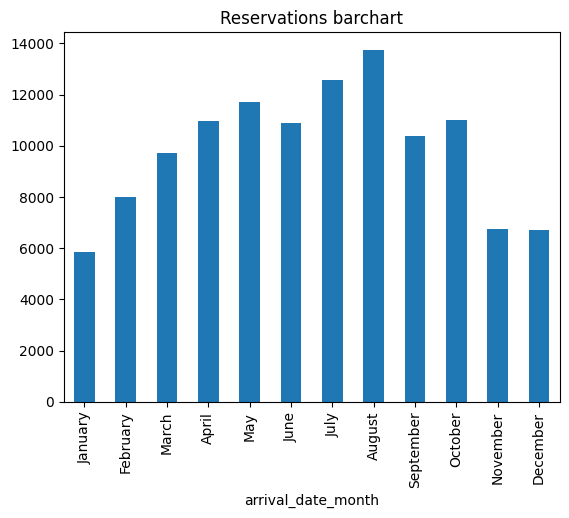

In [171]:
# Reservations for each month
df_cleaned['arrival_date_month'].value_counts().reindex(month_order).plot(kind='bar')
plt.title('Reservations barchart')


Text(0.5, 1.0, 'Cancelations barchart')

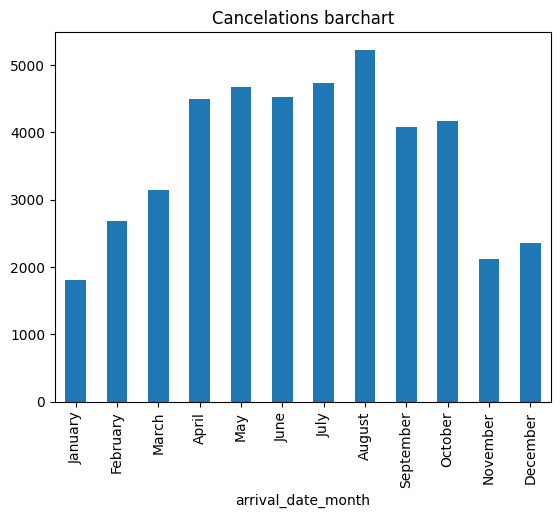

In [172]:
# Cancelations for each month
canceled_df['arrival_date_month'].value_counts().reindex(month_order).plot(kind='bar')
plt.title('Cancelations barchart')


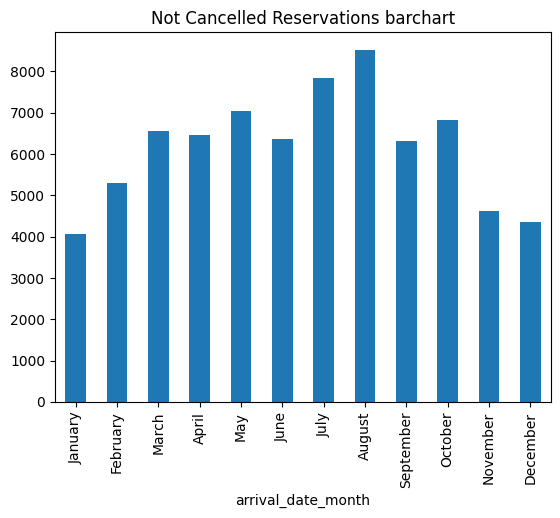

In [173]:
# Cancelations for each month
ax = not_canceled_df['arrival_date_month'].value_counts().reindex(month_order).plot(kind='bar')
plt.title('Not Cancelled Reservations barchart')
plt.show()

In [174]:
holiday = ['1 January', '6 January', '27 March', '5 April', '16 April', '1 May', '15 August', '31 October', '1 November', '24 December', '25 December', '31 December']
holiday_df = None
for day in holiday:
    split = day.split(" ")
    num = split[0]
    month = split[1]
    select = df_cleaned[(df_cleaned['arrival_date_month'] == month) & (df_cleaned['arrival_date_day_of_month']== int(num))]
    holiday_df = pd.concat([holiday_df, select])
print(len(holiday_df))

3278


In [175]:
# holiday_df.to_csv('holiday_df.csv', index=False)

In [176]:
day = list(holiday_df['arrival_date_day_of_month'].values)
mon = list(holiday_df['arrival_date_month'].values)
for i in range(len(day)):
    day[i] = (f'{day[i]} {mon[i]}')
holiday_df['DayMonth'] = day


In [177]:
count_holidays_res = holiday_df.groupby('DayMonth')['is_canceled'].count()

In [178]:
count_holidays_canc = holiday_df.groupby('DayMonth')['is_canceled'].sum()

In [179]:
percentage_holiday = count_holidays_canc / count_holidays_res
percentage_holiday

DayMonth
1 January      0.350877
1 May          0.402730
1 November     0.509363
15 August      0.410646
16 April       0.378788
24 December    0.274882
25 December    0.328571
27 March       0.333333
31 December    0.328205
31 October     0.370482
5 April        0.334247
6 January      0.275000
Name: is_canceled, dtype: float64

In [180]:
month_perc_holiday = (holiday_df.groupby('arrival_date_month')['is_canceled'].sum()/holiday_df.groupby('arrival_date_month')['is_canceled'].count()).reindex(month_order)

In [181]:
percentage_total = len(df_cleaned[df_cleaned['is_canceled']==1])/len(df_cleaned)
percentage_total

0.37217895707025866

In [182]:
month_perc =(df_cleaned.groupby('arrival_date_month')['is_canceled'].sum()/df_cleaned.groupby('arrival_date_month')['is_canceled'].count()).reindex(month_order)

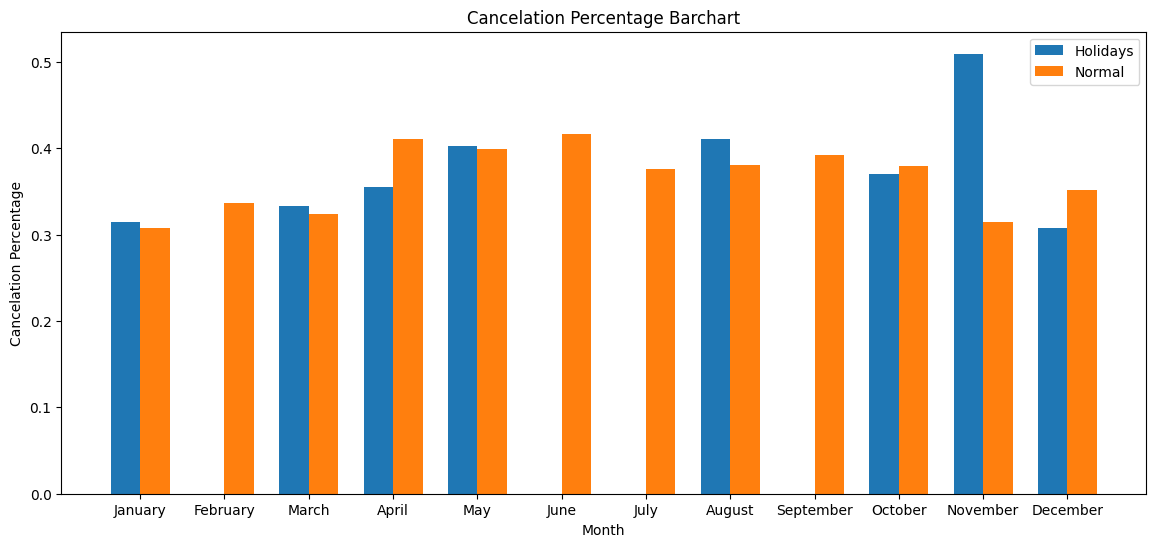

In [183]:
plt.figure(figsize=(14,6))
index = np.arange(len(month_perc_holiday))
bar_width = 0.35
plt.bar(index-bar_width/2, month_perc_holiday, bar_width, label='Serie 1')
plt.bar(index+bar_width/2, month_perc, bar_width, label='Serie 2')
plt.xlabel('Month')
plt.ylabel('Cancelation Percentage')
plt.title('Cancelation Percentage Barchart')
plt.xticks(index, labels=month_perc_holiday.index)  # Impostare gli indici sull'asse x
plt.legend(['Holidays', 'Normal'])  # Mostrare la legenda

plt.show()

### Caracteristics

In [184]:
categorical_vars = ['hotel', 'meal', 'country', 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'agent', 'company', 'customer_type']
numeric_vars = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']
target_var = 'is_canceled'

In [185]:
df_cleaned

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,No Agent,No Company,0,Transient,0.00,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,No Agent,No Company,0,Transient,75.00,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,304.0,No Company,0,Transient,75.00,0,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,240.0,No Company,0,Transient,98.00,0,1
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,240.0,No Company,0,Transient,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119384,City Hotel,0,21,2017,August,35,30,2,5,2,...,A,0,No Deposit,394.0,No Company,0,Transient,96.14,0,2
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,394.0,No Company,0,Transient,96.14,0,0
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,9.0,No Company,0,Transient,225.43,0,2
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,89.0,No Company,0,Transient,104.40,0,0


In [246]:
count_rows = df_cleaned[(df_cleaned['country'] == 'PRT') & (df_cleaned['deposit_type'] == 'Non Refund') & (df_cleaned['market_segment'] == 'Groups')].shape[0]
print("Numero di righe con country = 'PRT', deposit type = 'Non Refund' e customer type = 'Groups':", count_rows)

Numero di righe con country = 'PRT', deposit type = 'Non Refund' e customer type = 'Groups': 14130


In [186]:
df_cleaned[numeric_vars+['is_canceled']].groupby('is_canceled').mean()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,,,,,,,,,,,,,,
0,79.975151,0.926422,2.455931,1.831753,0.102212,0.010236,0.043058,0.015394,0.191022,0.279577,1.479084,100.107823,0.098184,0.699763
1,144.515029,0.925480,2.559196,1.894172,0.106486,0.003817,0.012405,0.208474,0.023447,0.093514,3.096263,104.988415,0.000000,0.325707


In [187]:
df_cleaned[categorical_vars+['is_canceled']].groupby('is_canceled').count()

,hotel,meal,country,arrival_date_year,arrival_date_month,arrival_date_day_of_month,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,agent,company,customer_type
is_canceled,,,,,,,,,,,,,,
0,74248,74248,74248,74248,74248,74248,74248,74248,74248,74248,74248,74248,74248,74248
1,44015,44015,44015,44015,44015,44015,44015,44015,44015,44015,44015,44015,44015,44015


<Figure size 1000x600 with 0 Axes>

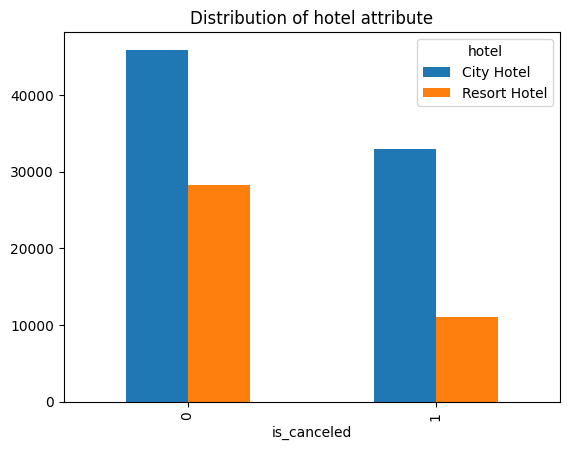

<Figure size 1000x600 with 0 Axes>

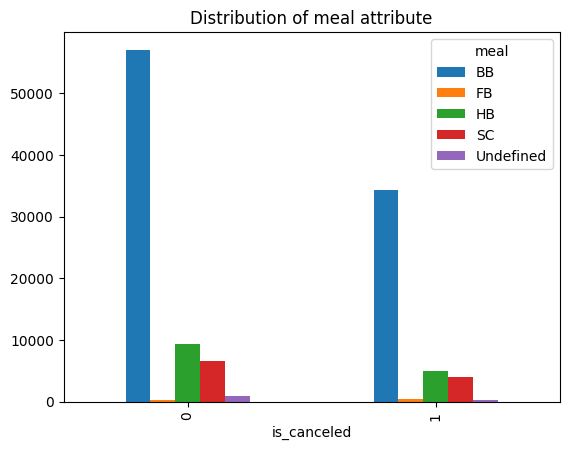

<Figure size 1000x600 with 0 Axes>

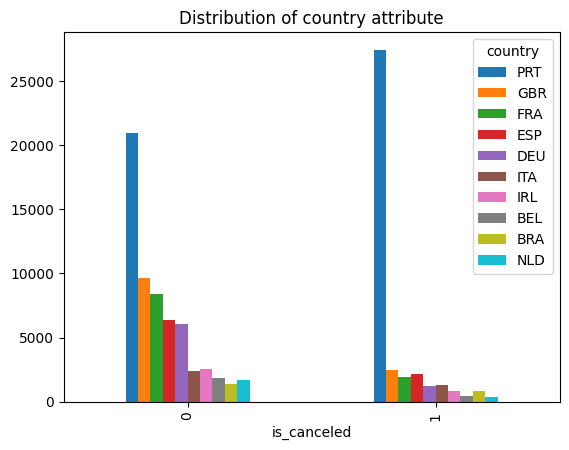

<Figure size 1000x600 with 0 Axes>

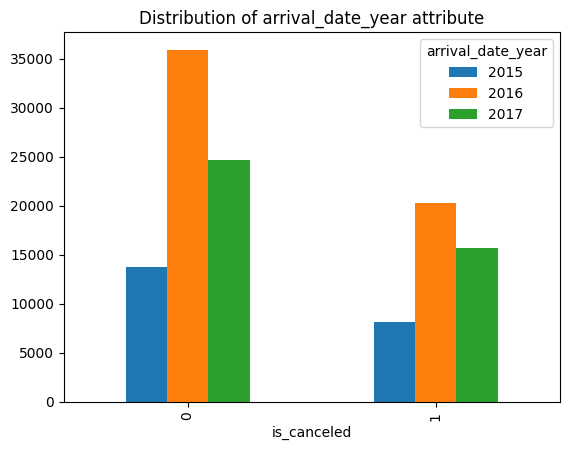

<Figure size 1000x600 with 0 Axes>

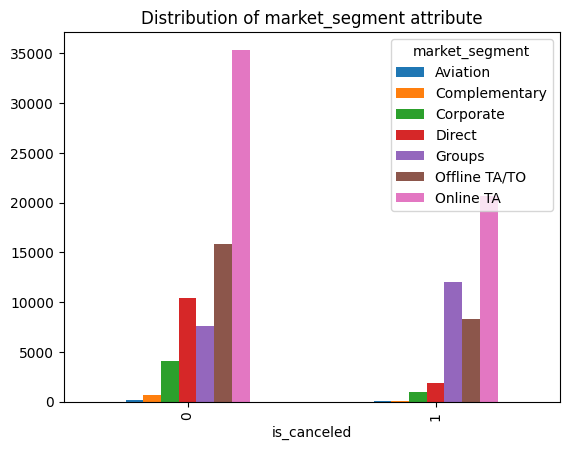

<Figure size 1000x600 with 0 Axes>

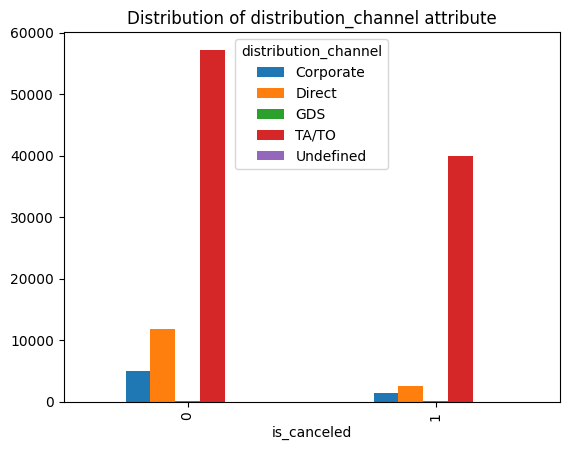

<Figure size 1000x600 with 0 Axes>

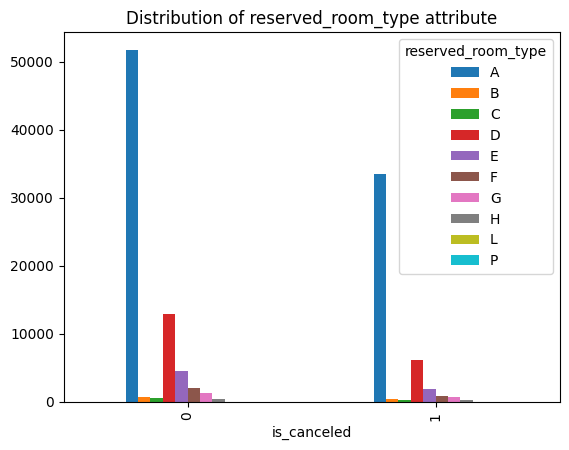

<Figure size 1000x600 with 0 Axes>

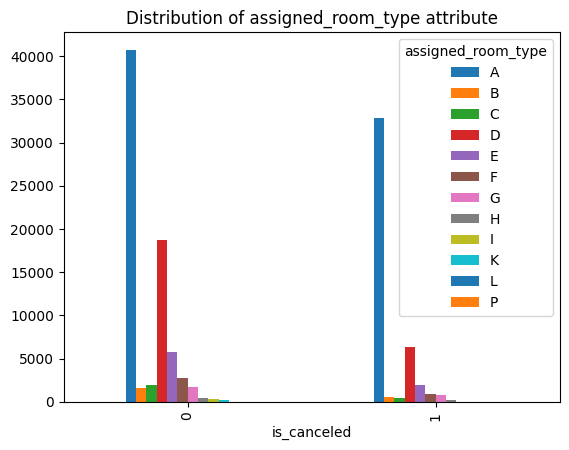

<Figure size 1000x600 with 0 Axes>

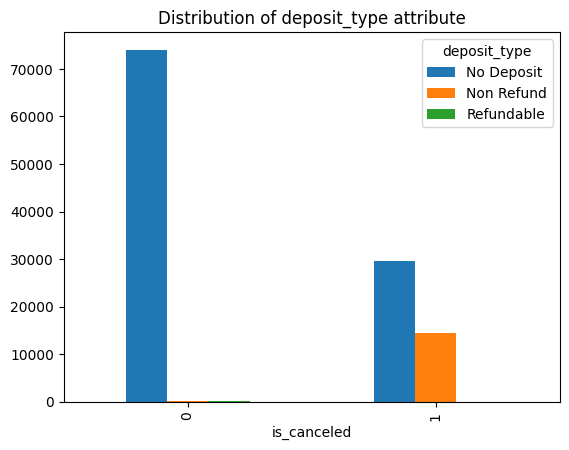

<Figure size 1000x600 with 0 Axes>

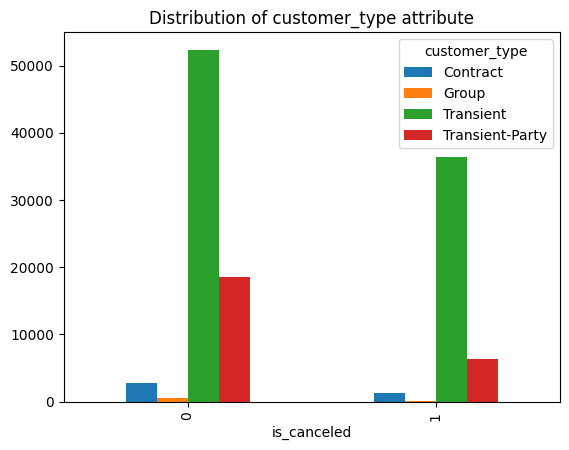

In [238]:
deleting_cat_vars = ['arrival_date_month', 'arrival_date_day_of_month', 'agent', 'company']
plotting_categorical_vars = [elem for elem in categorical_vars if elem not in deleting_cat_vars]
for i in plotting_categorical_vars:
    plt.figure(figsize=(10,6))
    crosstab_table = pd.crosstab(df_cleaned['is_canceled'], df_cleaned[i])
    if i=='country':
        top_10_var_y = crosstab_table.sum().nlargest(10).index

        # Filtra la tabella di contingenza per includere solo queste 10 categorie
        crosstab_table = crosstab_table[top_10_var_y]
    crosstab_table.plot(kind='bar')
    plt.title(f'Distribution of {i} attribute')
    plt.show()

<Figure size 1000x600 with 0 Axes>

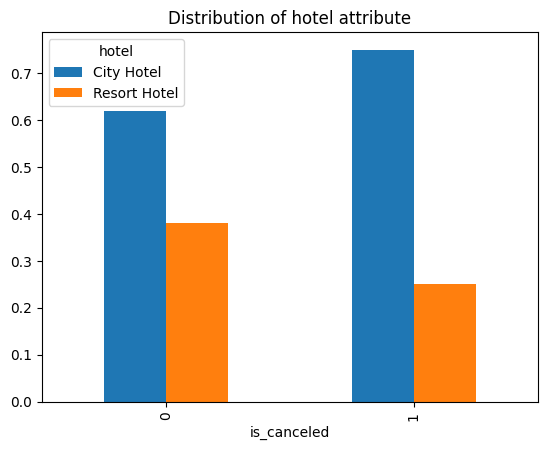

<Figure size 1000x600 with 0 Axes>

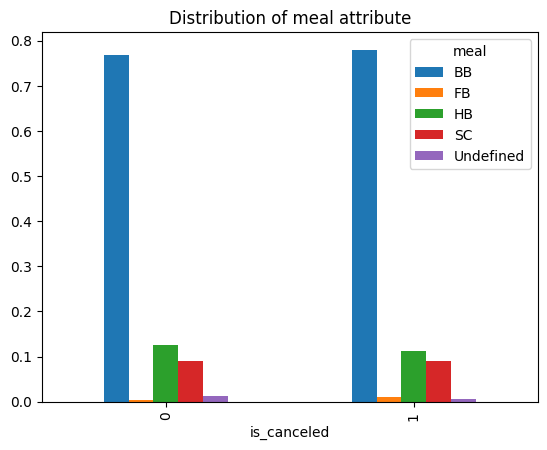

<Figure size 1000x600 with 0 Axes>

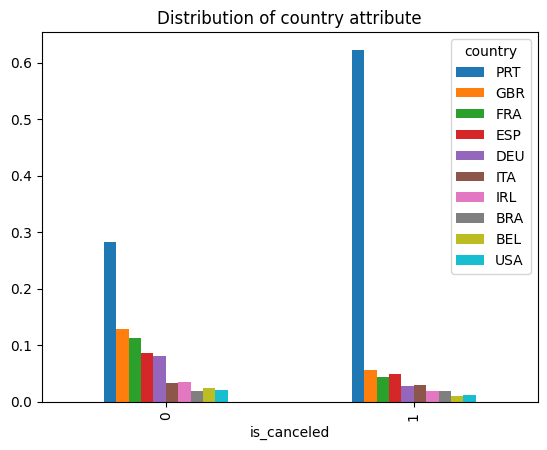

<Figure size 1000x600 with 0 Axes>

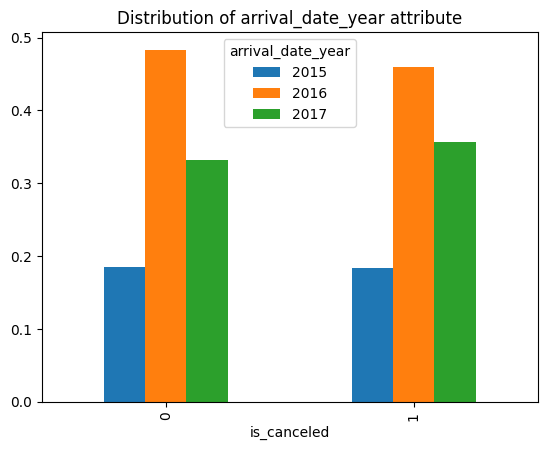

<Figure size 1000x600 with 0 Axes>

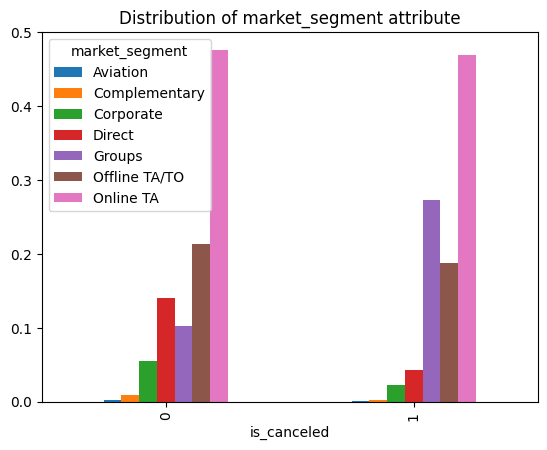

<Figure size 1000x600 with 0 Axes>

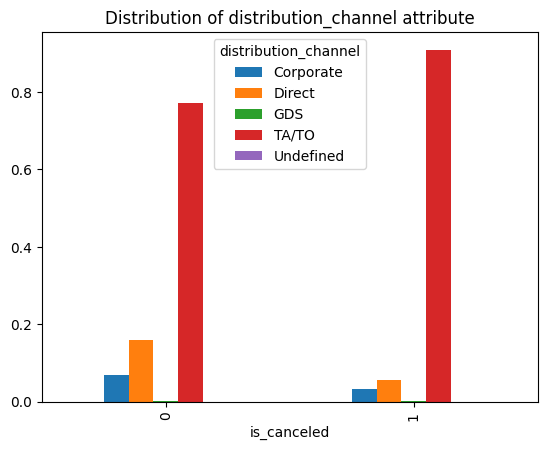

<Figure size 1000x600 with 0 Axes>

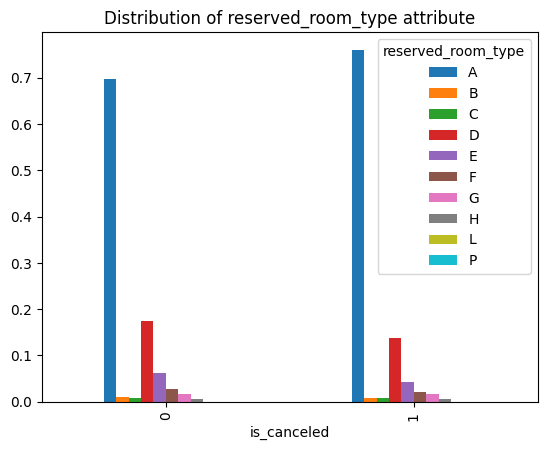

<Figure size 1000x600 with 0 Axes>

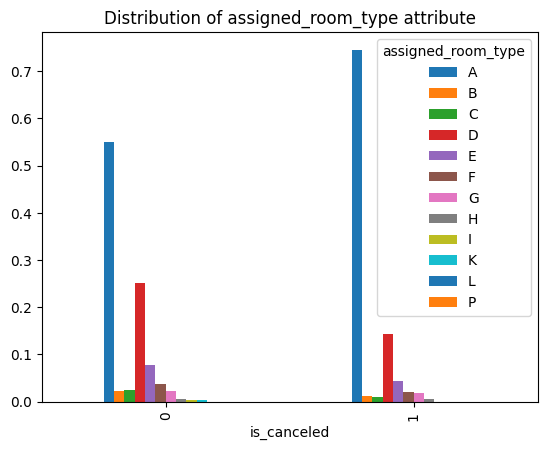

<Figure size 1000x600 with 0 Axes>

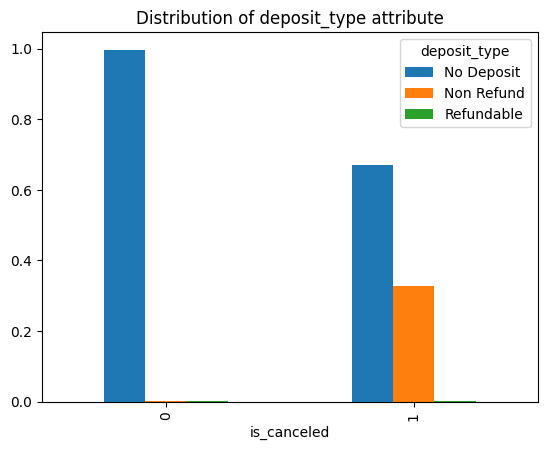

<Figure size 1000x600 with 0 Axes>

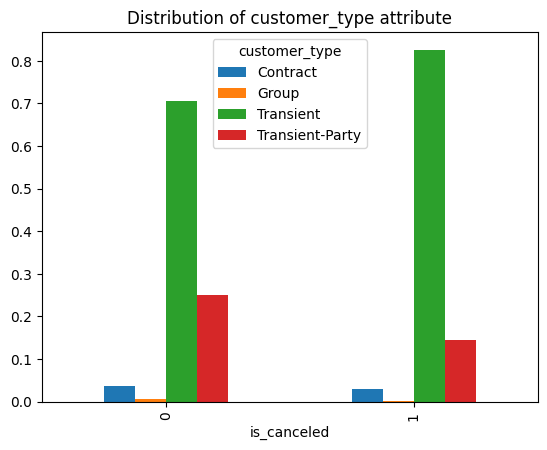

In [237]:
deleting_cat_vars = ['arrival_date_month', 'arrival_date_day_of_month', 'agent', 'company']
plotting_categorical_vars = [elem for elem in categorical_vars if elem not in deleting_cat_vars]
for i in plotting_categorical_vars:
    plt.figure(figsize=(10,6))
    crosstab_table = pd.crosstab(df_cleaned['is_canceled'], df_cleaned[i], normalize='index')
    if i=='country':
        top_10_var_y = crosstab_table.sum().nlargest(10).index

        # Filtra la tabella di contingenza per includere solo queste 10 categorie
        crosstab_table = crosstab_table[top_10_var_y]
    crosstab_table.plot(kind='bar')
    plt.title(f'Percentage Distribution of {i} attribute normalized')
    plt.show()

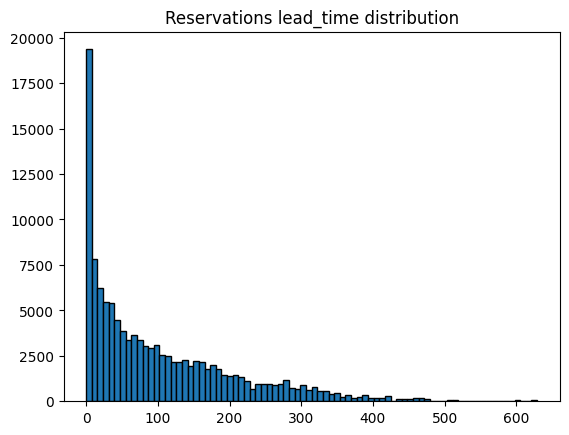

In [189]:
plt.hist(df_cleaned['lead_time'], bins=80, edgecolor='black')
plt.title('Reservations lead_time distribution')
plt.show()

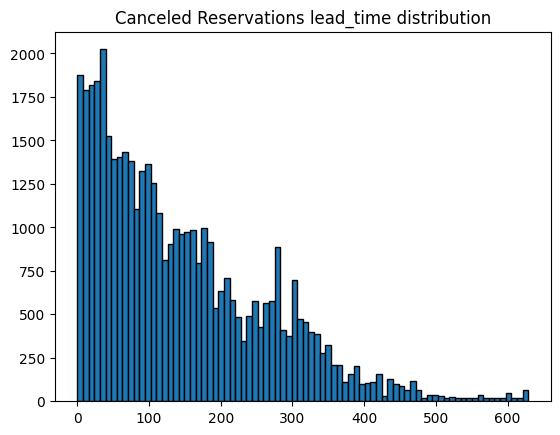

In [190]:
plt.hist(canceled_df['lead_time'], bins=80, edgecolor='black')
plt.title('Canceled Reservations lead_time distribution')
plt.show()

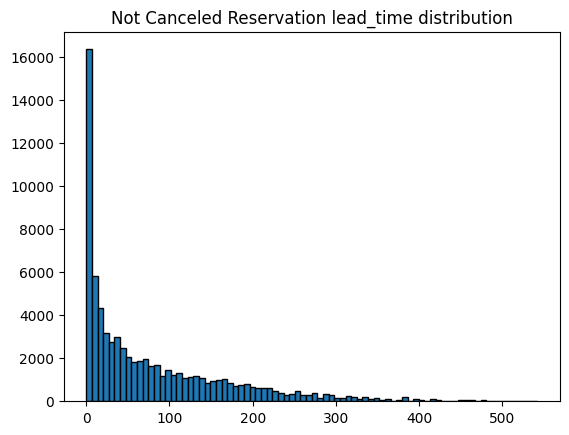

In [191]:
plt.hist(not_canceled_df['lead_time'], bins=80, edgecolor='black')
plt.title('Not Canceled Reservation lead_time distribution')
plt.show()

I did a Principal Component Analysis (PCA) on my dataframe in order to make a more understandable visualization. I reduced components to two, so that I can visualize the data easily with only two axis and then I applied a KMeans clustering to look for clusters in my data. As visible in the figure, the 'is_canceled' values do not create distinct clusters but only a huge cloud in the centre. Anyway appears clear that leftier the points are, the more probable it does not belong to a 1 class in 'is_canceled' attribute and vice versa. The majority of purple points, compared to the yellow ones are, of course, given by the prevalence of not canceled rows in the data over the canceled ones.
The variable factor map shows the most important factors (as we selected them using a threshold, to consent a proper visualization) to divide the two classes and we can see, as example, that reservations coming from Portugal are shifted more to the right and, as we can see, are more likely to belong to cancelled ones, perfectly in line with what previous analyses showed.

C:\Users\fedep\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


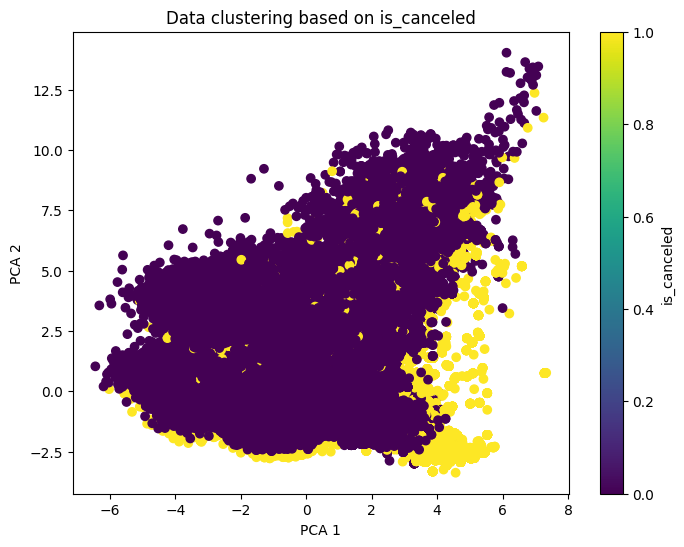

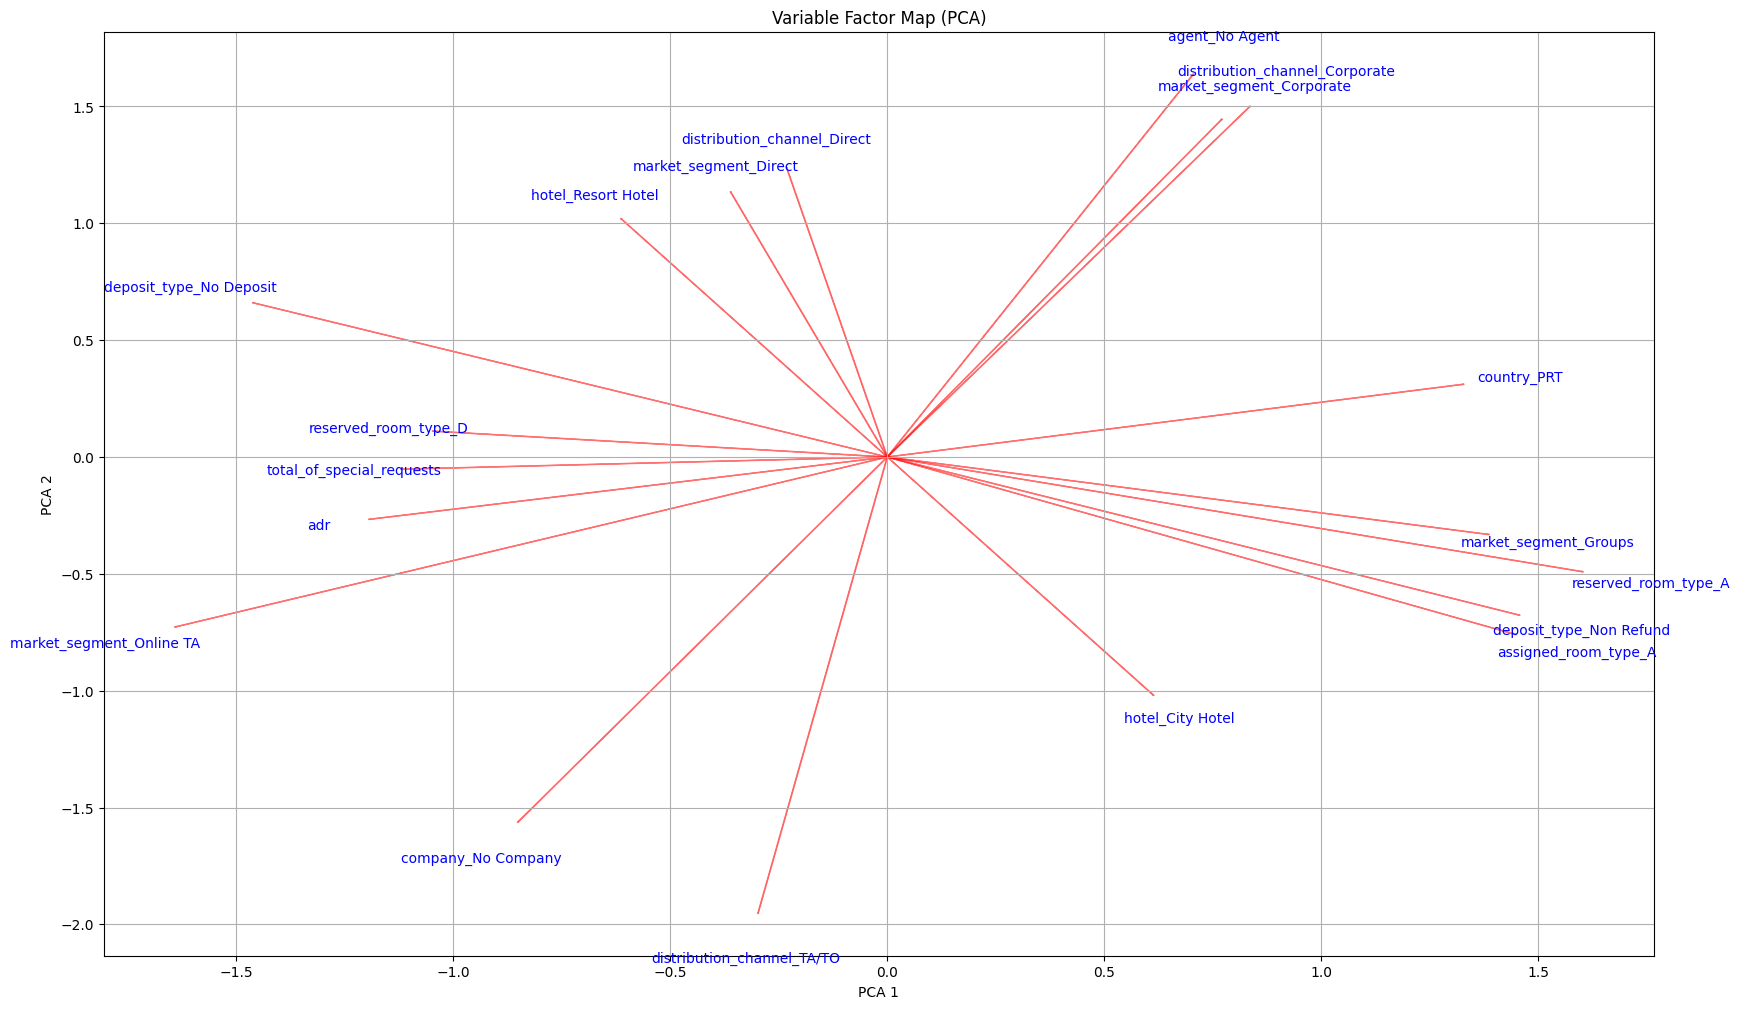

In [192]:
df_encoded = pd.get_dummies(df_cleaned)

# Standardizzazione dei dati
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_encoded)

# Riduzione della dimensionalità con PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Applicazione del clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(data_pca)

# Plot del grafico di clustering
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=df_cleaned['is_canceled'], cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Data clustering based on is_canceled')
plt.colorbar(label='is_canceled')
plt.show()

variable_factor_map = pca.components_.T * pca.explained_variance_
# Plot del variable factor map
plt.figure(figsize=(20, 12))
for i, var in enumerate(df_encoded.columns):
    if (variable_factor_map[i,0] > 1.0 or variable_factor_map[i,0] < -1.0) or (variable_factor_map[i,1] > 1.0 or variable_factor_map[i,1] < -1.0):
        plt.arrow(0, 0, variable_factor_map[i, 0], variable_factor_map[i, 1], color='r', alpha=0.5)
        plt.text(variable_factor_map[i, 0] * 1.1, variable_factor_map[i, 1] * 1.1, var, color='b', ha='center', va='center', fontsize=10)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Variable Factor Map (PCA)')
plt.grid()
plt.show()


### Variance

Here I looked for correlations between couples of numerical variables, in order to see if variance (and so predictive power) explained by variables is quite the same. Inspecting the correlation matrix, I noticed that, except the obvious 1s in the main diagonal, there isn't any extreme value (0.48 being the highest and -0.17 as the lowest). This result shows us that variables aren't strongly correlated one with each other.

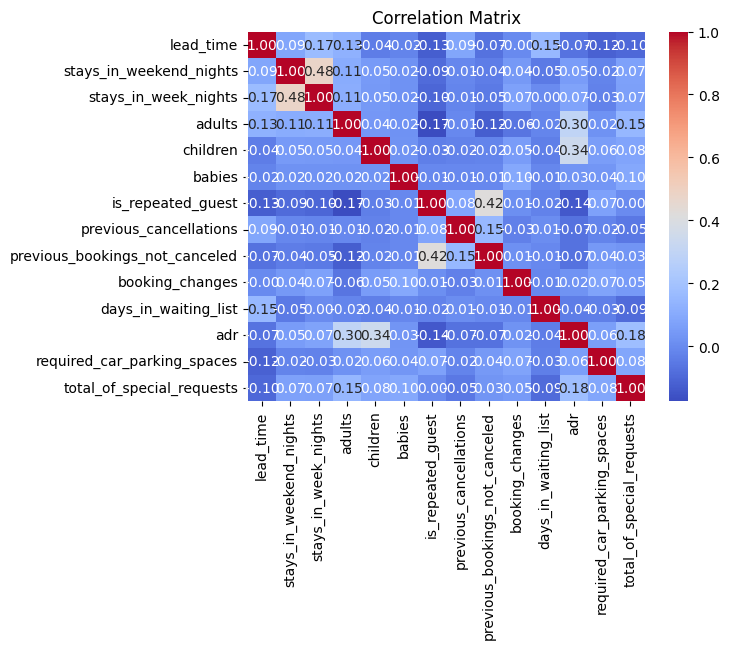

In [193]:
correlation_matrix = df_cleaned[numeric_vars].corr()

# Utilizza il metodo heatmap di Seaborn per visualizzare la matrice di correlazione
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Visualizza il plot
plt.title('Correlation Matrix')
plt.show()

Among categorical variables, there are ordinal variables like arrival_date_month or arrival_date_week_number. As imaginable, those two variables represent quite the same information, so, after converting month categories to their number, I inspected the correlation between them with a scatter plot. As visible in the graph, the points leads to an almost perfect identity function, meaning that they provide almost the same predictive power and so I can proceed with the deletion of 'arrival_date_week_number'

C:\Users\fedep\AppData\Local\Temp\ipykernel_7804\4081375795.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<Axes: xlabel='arrival_date_month', ylabel='arrival_date_week_number'>

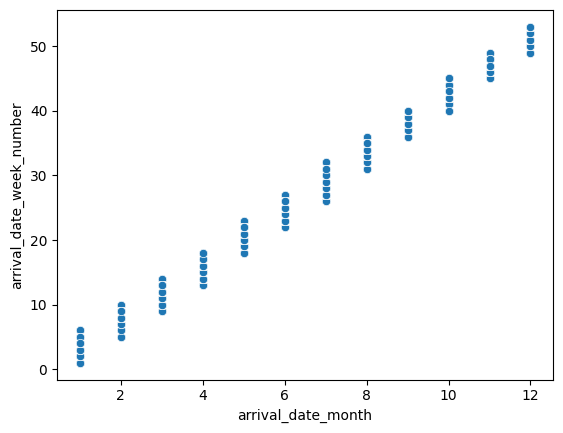

In [194]:
months_order_map = {key: index+1 for index, key in enumerate(month_order)}
df_reordered = df_cleaned[['arrival_date_week_number', 'arrival_date_month']]
df_reordered['arrival_date_month'] = df_reordered['arrival_date_month'].map(months_order_map)

sns.scatterplot(data=df_reordered, x='arrival_date_month', y='arrival_date_week_number')

In [195]:
df_cleaned = df_cleaned.drop(['arrival_date_week_number'], axis=1)

## OneHot Encoding and MinMaxScaling

As whichever model can deal only with boolean and numeric values, I need to encode categorical values in a way that the machine can understand. In order to do that I use OneHotEncoding, so, for every categorical variable, every category becomes a column in the dataframe, having True (or 1) only in the rows belonging to that category and False in each other.

In [196]:
for i in numeric_vars:
    df_cleaned[i] = df_cleaned[i].astype(float)

In [197]:
for i in categorical_vars:
    df_cleaned[i] = df_cleaned[i].astype(str)

In [198]:
print(df_cleaned.dtypes)

hotel                              object
is_canceled                         int64
lead_time                         float64
arrival_date_year                  object
arrival_date_month                 object
arrival_date_day_of_month          object
stays_in_weekend_nights           float64
stays_in_week_nights              float64
adults                            float64
children                          float64
babies                            float64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                 float64
previous_cancellations            float64
previous_bookings_not_canceled    float64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                   float64
deposit_type                       object
agent                              object
company                           

In [199]:
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_vars)

In [200]:
df_encoded.head()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,...,company_92.0,company_93.0,company_94.0,company_96.0,company_99.0,company_No Company,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,True,False,False,True,False
2,0,7.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,True,False,False,True,False
3,0,13.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,True,False,False,True,False
4,0,14.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,True,False,False,True,False
5,0,14.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,True,False,False,True,False


# Modeling

For the modeling part, I tried to find the best model available among the ones I could use. As I need to predict the probability of belonging to one category or another one (which are 1 and 0, meaning canceled and not canceled), I can use Logistic Regression, Decision Tree or Neural Network. We investigated all of them, to take the best from each model.

## Logistic Regression

At first I try the Logistic Regression as it's the easiest one. I start doing the train-test split with a 80/20 split ratio as it looks reasonable for a dataset like mine. Then I create a pipeline with, at first, a MinMaxScaling for the numerical variables, in order to compress the values to make them usable by the model. Then I create the Logistic Regression model and fit it to the dataset. The results are promising as we got an overall 82.96% of accuracy. Recall, precision and, as a consequence, F1-Score are a bit lower, due to the slightly unbalanced dataset.

In [202]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


# Definizione delle categorie per ciascuna colonna categorica
all_categories = {
    f'{col}': list(df_cleaned[col].unique()) for col in categorical_vars 
}


# One-hot encoding con tutte le categorie specificate
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(categories=[all_categories[column] for column in categorical_vars]), categorical_vars),
        ('num', MinMaxScaler(), numeric_vars)
    ],
    remainder='passthrough'
)


# Definizione del modello di regressione logistica
logistic_model = LogisticRegression()

# Creazione della pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', logistic_model)
])

# Splitting del dataset in training set e test set
X_train, X_test, y_train, y_test = train_test_split(df_cleaned.drop(columns=[target_var]), 
                                                    df_cleaned[target_var], 
                                                    test_size=0.2, random_state=42)


C:\Users\fedep\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy: 0.8296199213630406
Precision: 0.8083184940218774
Recall: 0.7158143726064429
F1-score: 0.7592592592592593


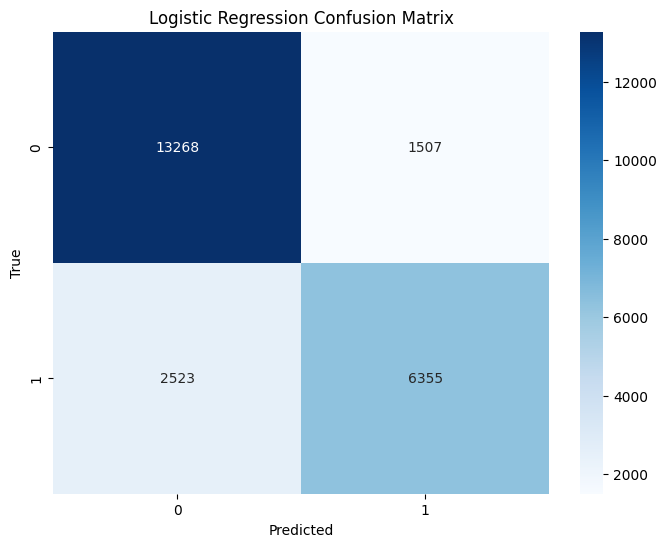

In [203]:
# Addestramento del modello utilizzando il training set
pipeline.fit(X_train, y_train)

# Valutazione del modello sul test set
predictions = pipeline.predict(X_test)

# Calcolo dell'accuratezza
accuracy = accuracy_score(y_test, predictions)
# Number of correct predictions / Total predictions
print("Accuracy:", accuracy)

precision = precision_score(y_test, predictions)
# Number of true positives (actual and predicted canceled bookings) / Total predicted positives (all bookings predicted as canceled)
print("Precision:", precision)

# Calcolo del recall
recall = recall_score(y_test, predictions)
# Number of true positives (actual and predicted canceled bookings) / Total actual positives (all canceled bookings in dataset)
print("Recall:", recall)

# Calcolo dell'F1-score
f1 = f1_score(y_test, predictions)
# Weighted mean of precision and recall
print("F1-score:", f1)

# Calcolo e visualizzazione della matrice di confusione
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

Then I inspected more the the model I used, in order to look for the contribution each variable gave to it. I look for the F-Statistic of the different variables and I manage to get the following results, showing only the 20 most significant variables in the model. As the F-Statistic confirms, lead_time is one of the most significant variables, with a high F-statistic value. So do deposit_type and country but, as I said previously, this can happen also because of the contemporary presence of these two categories, as Portuguese groups tend to make reservations, without refund, but to cancel then.

In [201]:
# Variables explaining most (most useful for prediction)
# Result
#                            Feature   F-Statistic 

                           
# 0                        lead_time   8935.109487   
# 247        deposit_type_Non Refund  28656.575573   
# 246        deposit_type_No Deposit  28094.189768 
# 169                    country_PRT  12023.316388     
# 238           assigned_room_type_D   1530.890236   
# 235           assigned_room_type_A   3776.324812   
# 223     distribution_channel_TA/TO   2961.347771   
# 221    distribution_channel_Direct   2151.956034   
# 216          market_segment_Groups   4827.071465   
# 11                 booking_changes   1963.821820   
# 215          market_segment_Direct   2244.406246   
# 251        customer_type_Transient   1703.541970   
# 19              hotel_Resort Hotel   1758.282386   
# 16     required_car_parking_spaces   3777.073557   
# 17       total_of_special_requests   5530.010865   
# 18                hotel_City Hotel   1758.282386   
# 252  customer_type_Transient-Party   1474.591874  
# 96                     country_GBR   1330.458087  
# 93                     country_FRA   1307.964583  
# 9           previous_cancellations   1178.641789  

Then I create the Decision Tree model as alternative to the previous one. I do the same process of train-test split, with the same ratio, MinMaxScaling of variables and then I fit the model. The results are way better than the previous model, with a 86.54% of accuracy. I select this model also to visualize and understand the tree structure of decisioning the model is making but, due to the OneHotEncoding, the attributes of the dataset explodes and any kind of visualization is impossible, so we have to stick with Logistic Regression significativity variable explanation.

## Decision Tree

Accuracy: 0.8653870544962584
Precision: 0.8219131614654003
Recall: 0.81876548772246
F1-score: 0.8203363051574316


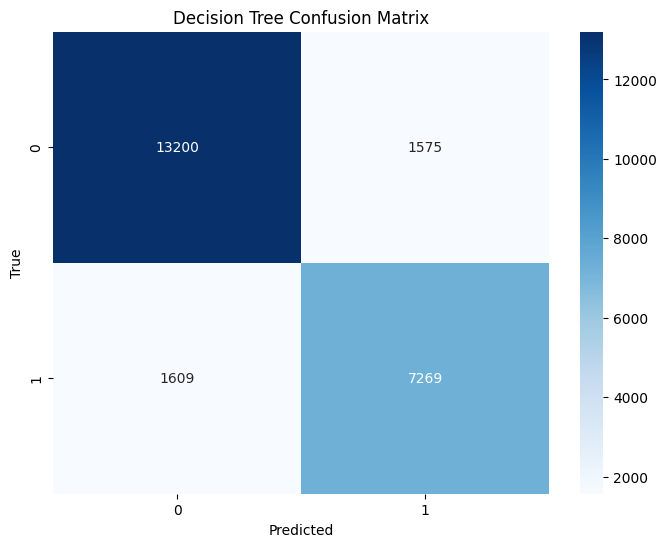

In [204]:
decision_tree_model = DecisionTreeClassifier()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(categories=[all_categories[column] for column in categorical_vars]), categorical_vars),
        ('num', MinMaxScaler(), numeric_vars)
    ],
    remainder='passthrough'
)
# Creazione della pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', decision_tree_model)
])

# Splitting del dataset in training set e test set
X_train, X_test, y_train, y_test = train_test_split(df_cleaned.drop(columns=[target_var]), 
                                                    df_cleaned[target_var], 
                                                    test_size=0.2, random_state=42)

X_train_tree = X_train[categorical_vars + numeric_vars]

# Addestramento del modello utilizzando il training set
pipeline.fit(X_train_tree, y_train)

# Valutazione del modello sul test set
predictions = pipeline.predict(X_test)

# Calcolo dell'accuratezza
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calcolo della precision
precision = precision_score(y_test, predictions)
print("Precision:", precision)

# Calcolo del recall
recall = recall_score(y_test, predictions)
print("Recall:", recall)

# Calcolo dell'F1-score
f1 = f1_score(y_test, predictions)
print("F1-score:", f1)

# Calcolo e visualizzazione della matrice di confusione
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Decision Tree Confusion Matrix')
plt.show()

Then, in order to get better performances, I move to the neural network, aware that whichever result I will get, it wil be quite a black box model, which is exactly what I got. After some tries and some different architecture models, I manage to choose the best model, being a dense neural network with 4 layers of 64-32-16-1 neurons, having L2 reguralizers in each layer, BatchNormalization and LeakyReLU as activation function. Then, in order to minimize overfitting, I add one Dropout layer at each hidden layer. I optimize all with a Nadam optimizer, early stopping and model checkpoint to reduce learning rate dynamically. With this architecture I manage to get 87.15% of accuracy with an epoch value of 80, but stopping already at epoch 69 due to early stopping.

## Neural Network

In [215]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense, Dropout, Activation, Flatten, LeakyReLU, BatchNormalization
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2
from keras.callbacks import TerminateOnNaN, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.optimizers import Nadam





# Definizione delle feature e della target variable
X = df_encoded.drop('is_canceled', axis=1)  # Feature
y = df_encoded['is_canceled']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creazione del modello
model = Sequential()
model.add(Dense(64, kernel_regularizer=l2(0.001), input_shape=(X_train_scaled.shape[1],)))
model.add(BatchNormalization())  # Batch normalization layer
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.4))
model.add(Dense(32))
model.add(BatchNormalization())  # Batch normalization layer
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.4))
model.add(Dense(16))
model.add(BatchNormalization())  # Batch normalization layer
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

opt = Nadam(learning_rate=1e-3, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model.summary()

# Compilazione del modello
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

epochs = 80
model_checkpoint = ModelCheckpoint('model.keras', monitor='val_accuracy', verbose=1, save_best_only=True)
reduce_lr = ReduceLROnPlateau('val_accuracy', factor=0.1, patience=5, verbose=1)
early_stop = EarlyStopping('val_accuracy', patience=10, verbose=1)
terminate = TerminateOnNaN()
callbacks = [model_checkpoint, reduce_lr, early_stop, terminate]
# Addestramento del modello
history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=128, validation_split=0.2, callbacks=callbacks)

# Valutazione del modello sul test set
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Accuracy:", accuracy)



C:\Users\fedep\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
C:\Users\fedep\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_49 (Dense)                │ (None, 64)             │        62,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_12 (LeakyReLU)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_13 (LeakyReLU)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_14 (LeakyReLU)      │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,089 (254.25 KB)

 Trainable params: 64,865 (253.38 KB)

 Non-trainable params: 224 (896.00 B)

Epoch 1/80
592/592 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6613 - loss: 0.6936
Epoch 1: val_accuracy improved from -inf to 0.83067, saving model to model.keras
592/592 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6615 - loss: 0.6933 - val_accuracy: 0.8307 - val_loss: 0.3898 - learning_rate: 0.0010
Epoch 2/80
584/592 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8259 - loss: 0.4092
Epoch 2: val_accuracy improved from 0.83067 to 0.84367, saving model to model.keras
592/592 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8259 - loss: 0.4091 - val_accuracy: 0.8437 - val_loss: 0.3643 - learning_rate: 0.0010
Epoch 3/80
583/592 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8350 - loss: 0.3853
Epoch 3: val_accuracy improved from 0.84367 to 0.84943, saving model to model.keras
592/592 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8350 - loss: 0.3853 - val_accuracy: 0.8494 - val_loss: 0.3536 - learning_rate: 0.0010
Epoch 4/80
587/592 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.840

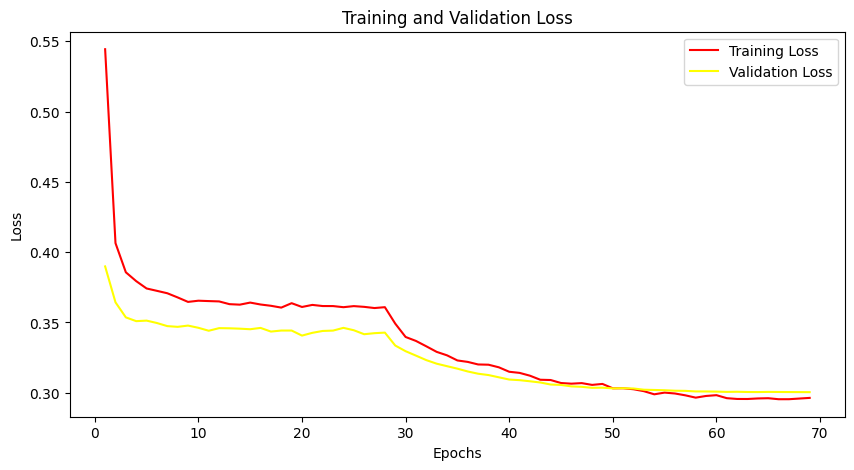

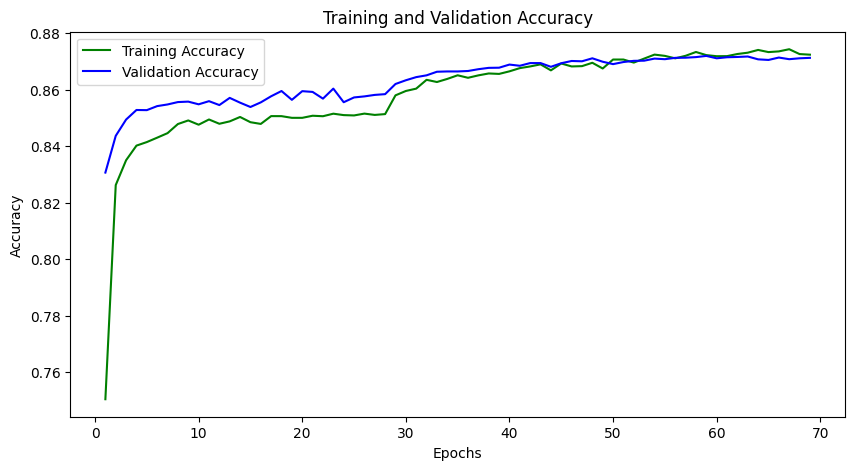

In [220]:
# Plotting
epochs_range = range(1, 70)

# Plotting training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(epochs_range, history.history['loss'], label='Training Loss', color='red')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss', color='yellow')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plotting training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy', color='green')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

740/740 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Test Accuracy: 0.8715596330275229
Precision: 0.8621031746031746
Recall: 0.7830592475782834
F1-score: 0.8206823279423917


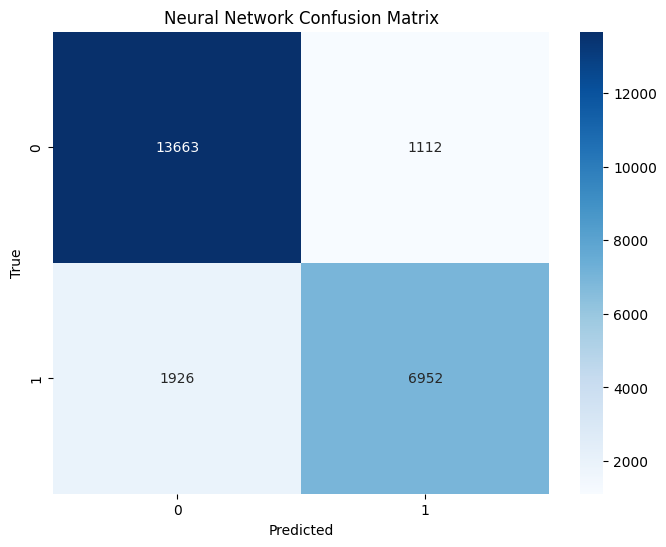

In [221]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Predictions on test set
probabilities = model.predict(X_test_scaled)

# Convert probabilities to binary predictions
predictions = (probabilities > 0.5).astype(int)
# Convert predictions to 1D array
predictions = predictions.ravel()

accuracy = accuracy_score(y_test, predictions)
print("Test Accuracy:", accuracy)
# Calculate precision
precision = precision_score(y_test, predictions)

# Calculate recall
recall = recall_score(y_test, predictions)

# Calculate F1-score
f1 = f1_score(y_test, predictions)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

conf_matrix = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Neural Network Confusion Matrix')
plt.show()